In [17]:
import pathlib
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import numpy as np
import tensorflow as tf
import os
from scipy import signal

import seaborn as sns

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models

In [18]:
pip install gdown==v4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [19]:


!gdown 1aNNWk-Xi9fIbXGzmcenKBHkfLxTdQaBn
!unzip voice_data.zip -d /content/
!rm -r voice_data.zip



Downloading...
From: https://drive.google.com/uc?id=1aNNWk-Xi9fIbXGzmcenKBHkfLxTdQaBn
To: /content/voice_data.zip
100% 5.98M/5.98M [00:00<00:00, 98.4MB/s]
Archive:  voice_data.zip
   creating: /content/data/green/
  inflating: /content/data/green/green_0.wav  
  inflating: /content/data/green/green_1.wav  
  inflating: /content/data/green/green_10.wav  
  inflating: /content/data/green/green_11.wav  
  inflating: /content/data/green/green_12.wav  
  inflating: /content/data/green/green_13.wav  
  inflating: /content/data/green/green_14.wav  
  inflating: /content/data/green/green_15.wav  
  inflating: /content/data/green/green_16.wav  
  inflating: /content/data/green/green_17.wav  
  inflating: /content/data/green/green_18.wav  
  inflating: /content/data/green/green_19.wav  
  inflating: /content/data/green/green_2.wav  
  inflating: /content/data/green/green_20.wav  
  inflating: /content/data/green/green_21.wav  
  inflating: /content/data/green/green_22.wav  
  inflating: /content

Text(0.5, 1.0, 'Audio: Green')

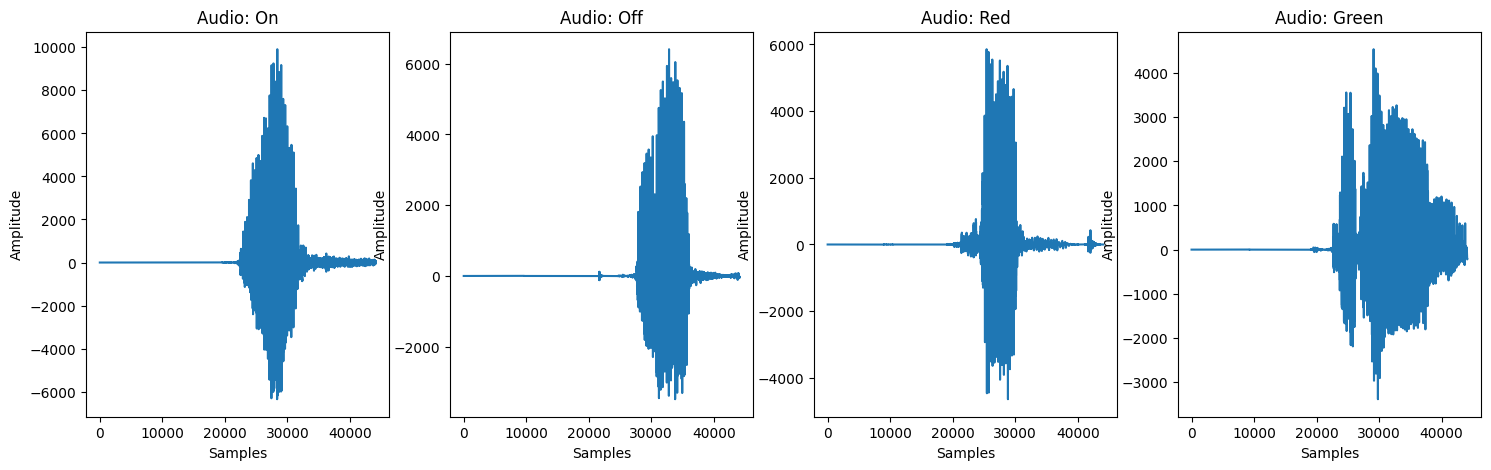

In [21]:
on_wav_file = read('/content/data/on/on_0.wav')
off_wav_file = read('/content/data/off/off_0.wav')
red_wav_file = read('/content/data/red/red_0.wav')
green_wav_file = read('/content/data/green/green_0.wav')

on_wav_file = on_wav_file[1]
off_wav_file = off_wav_file[1]
red_wav_file = red_wav_file[1]
green_wav_file = green_wav_file[1]

wavefile_plotter = plt.figure(figsize = (18,5))
on_plot  = wavefile_plotter.add_subplot(141)
off_plot  = wavefile_plotter.add_subplot(142)
red_plot  = wavefile_plotter.add_subplot(143)
green_plot  = wavefile_plotter.add_subplot(144)

on_plot.plot(on_wav_file)
on_plot.set_xlabel('Samples')
on_plot.set_ylabel('Amplitude')
on_plot.set_title('Audio: On')


off_plot.plot(off_wav_file)
off_plot.set_xlabel('Samples')
off_plot.set_ylabel('Amplitude')
off_plot.set_title('Audio: Off')


red_plot.plot(red_wav_file)
red_plot.set_xlabel('Samples')
red_plot.set_ylabel('Amplitude')
red_plot.set_title('Audio: Red')


green_plot.plot(green_wav_file)
green_plot.set_xlabel('Samples')
green_plot.set_ylabel('Amplitude')
green_plot.set_title('Audio: Green')


In [22]:
data_dir = pathlib.Path('/content/data/')
labels = np.array(tf.io.gfile.listdir( str(data_dir) ) )
audio_files_with_path = tf.io.gfile.glob(  str(data_dir) + '/*/*')

audio_path_dataset = tf.random.shuffle(audio_files_with_path)

In [23]:
wav_file_path = '/content/data/on/on_0.wav'
label = tf.strings.split(wav_file_path , os.path.sep)

label = label[-2]

wav_audio = tf.io.read_file(wav_file_path)
audio_tensor ,sr = tf.audio.decode_wav(wav_audio)
audio_tensor = tf.squeeze(audio_tensor , axis = -1)
audio_tensor.shape

TensorShape([44100])

In [24]:
def path_to_labeled_tensor(file_path):
  label = tf.strings.split(file_path , os.path.sep)
  label = label [-2]

  wav_audio = tf.io.read_file(file_path)
  audio_tensor , sr = tf.audio.decode_wav(wav_audio)
  audio_tensor = tf.squeeze(audio_tensor , axis = -1)
  return audio_tensor , label

data_tf_pipelines = tf.data.Dataset.from_tensor_slices(audio_path_dataset)
labled_wavform_dataset = data_tf_pipelines.map(path_to_labeled_tensor)

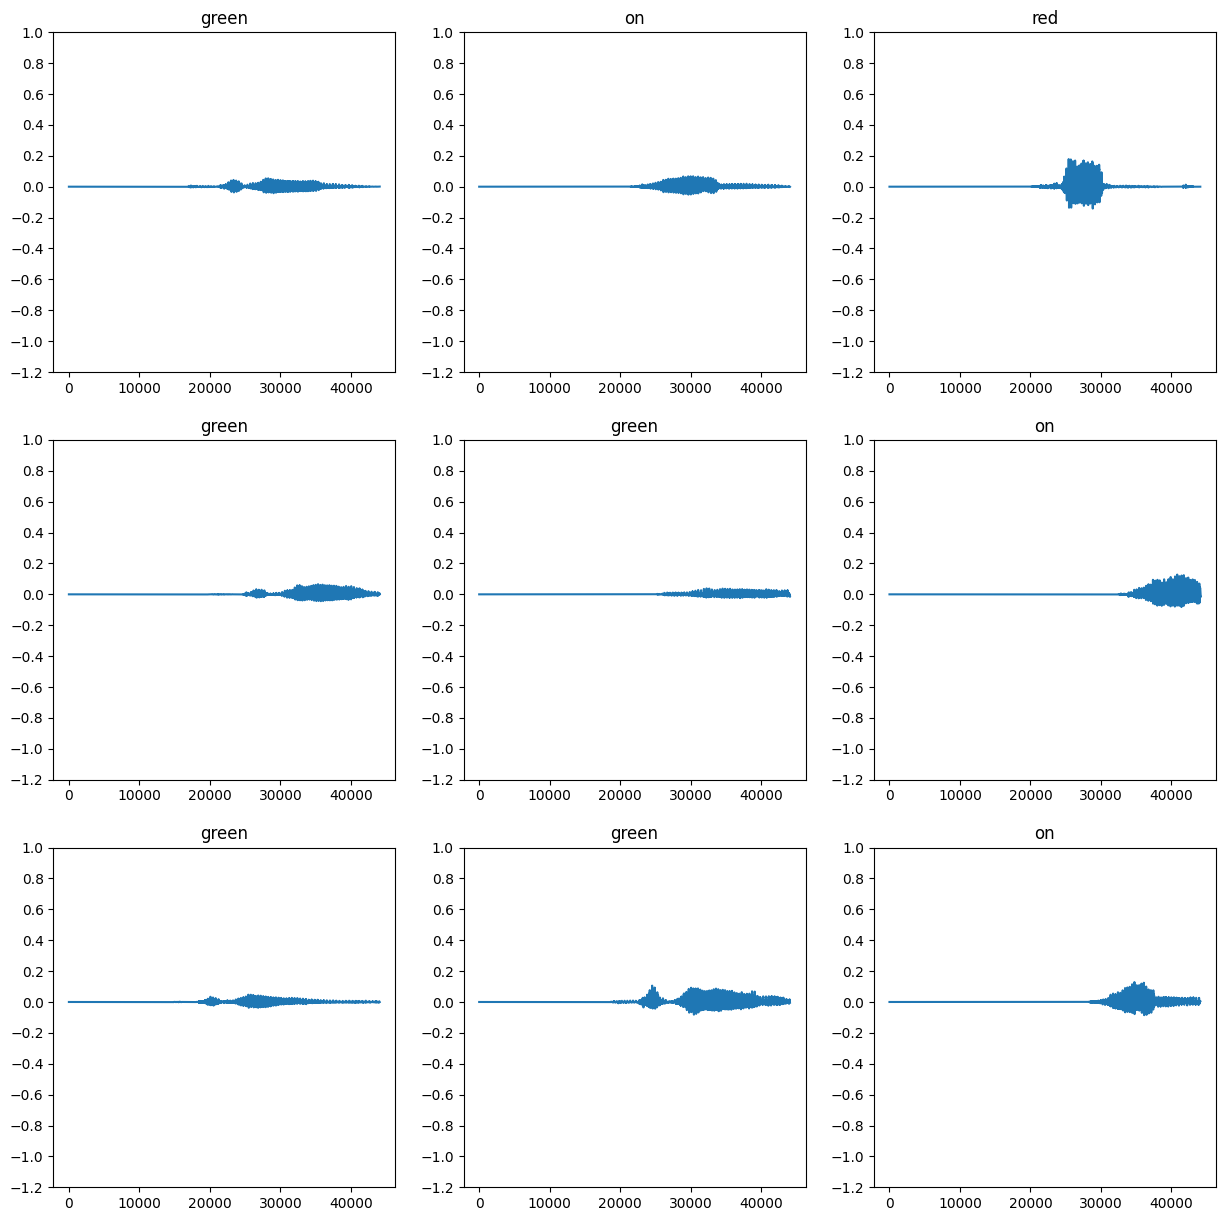

In [25]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i, (audio , label) in enumerate(labled_wavform_dataset.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio.numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label.numpy().decode('utf-8')
    ax.set_title(label)

plt.show()

Spectrogram Conversion

In [26]:

for waveform, label in labled_wavform_dataset.take(48):
  f , t ,spectrogram = signal.stft(waveform.numpy() , fs = 44100)
  spectrogram = tf.convert_to_tensor(np.abs(spectrogram))

spectrogram

<tf.Tensor: shape=(129, 346), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.1605707e-06,
        2.1425155e-06, 3.8369168e-07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.6233158e-06,
        3.0111687e-06, 7.1883585e-07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.2188460e-06,
        5.2301175e-06, 1.3527448e-06],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.8756147e-06,
        3.5028160e-07, 3.7889748e-07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.4178212e-06,
        1.5120794e-06, 4.2967309e-07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.4726976e-07,
        7.6492194e-07, 4.4787652e-07]], dtype=float32)>

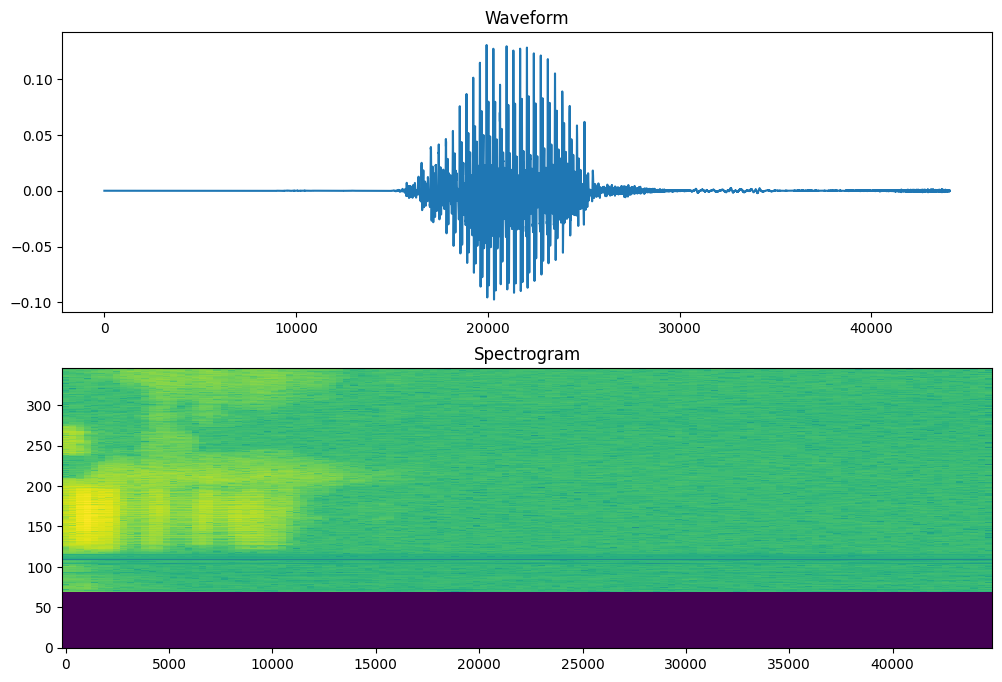

In [27]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()


- Splitting data into
  - Validation
  -testing
  -Training

In [31]:
training_dataset = audio_path_dataset[:120]
validation_dataset =audio_path_dataset [121:160]
testing_dataset  = audio_path_dataset [161:200]
len(audio_path_dataset)
print("Main Data set entries : "  , len(audio_path_dataset))
print("Training Data set entries : "  , len(training_dataset))
print("Validation Data set entries : "  , len(validation_dataset))
print("Testing Data set entries : "  , len(testing_dataset))

Main Data set entries :  200
Training Data set entries :  120
Validation Data set entries :  39
Testing Data set entries :  39


- Converting Raw_wav_path to labled Spectrograms


In [90]:
def path_to_labeled_tensor(file_path):
  label = tf.strings.split(file_path , os.path.sep)
  label = label[-2]

  wav_audio = tf.io.read_file(file_path)
  audio_tensor,sr = tf.audio.decode_wav(wav_audio)
  audio_tensor = tf.squeeze(audio_tensor , axis = -1)
  return audio_tensor , label

def stft(waveform):
  f, t, spec = signal.stft(waveform.numpy(), fs=44100, nperseg=255, noverlap = 124, nfft=256) #after changing from 22050 sampling rate to 44100 i managed to only get 1,129,338
  return tf.convert_to_tensor(np.abs(spec))

def wavforms_to_spectrograms(waveform,label):

  spectrogram = tf.py_function(func=stft, inp=[waveform], Tout=tf.float32)
  spectrogram.set_shape( (129,338)) #the training_ds from below returns shape unknown thats why im setting this
  spectrogram = tf.expand_dims(spectrogram , axis =0 )
  label = tf.math.argmax(label==labels)
  return spectrogram , label

def raw_wavefile_path_to_Spectrogram(input_path_dataset):
  data_tf_pipelines          = tf.data.Dataset.from_tensor_slices(input_path_dataset)
  labled_wavform_dataset     = data_tf_pipelines.map(path_to_labeled_tensor)
  spectrogram_labled_dataset = labled_wavform_dataset.map(wavforms_to_spectrograms)
  return spectrogram_labled_dataset

training_ds   = raw_wavefile_path_to_Spectrogram(audio_path_dataset)
testing_ds    = raw_wavefile_path_to_Spectrogram(testing_dataset)
validation_ds = raw_wavefile_path_to_Spectrogram(validation_dataset)

In [91]:
for waveform , label in training_ds.take(1):
  input_shape = waveform.shape

print("input shape" , input_shape )

input shape (1, 129, 338)


In [92]:
training_ds

<_MapDataset element_spec=(TensorSpec(shape=(1, 129, 338), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

- Batch define


In [93]:
num_batch = 1
train_data_batch = training_ds.batch(num_batch)
valid_data_batch = validation_ds.batch(num_batch)

Building and Training Model


First Model

    Batch size = 1
    Loss logits = False



In [95]:


norm_layer = preprocessing.Normalization()
norm_layer.adapt(train_data_batch.map(lambda x, _: x))

audio_led_model = models.Sequential()

audio_led_model.add(layers.Input(shape=input_shape))
audio_led_model.add(preprocessing.Resizing(32, 32))
audio_led_model.add(norm_layer)
audio_led_model.add(layers.Conv2D(32, 3, activation='relu'))
audio_led_model.add(layers.Conv2D(64, 3, activation='relu'))
audio_led_model.add(layers.MaxPooling2D())
audio_led_model.add(layers.Dropout(0.25))
audio_led_model.add(layers.Flatten())
audio_led_model.add(layers.Dense(128, activation='relu'))
audio_led_model.add(layers.Dropout(0.5))
audio_led_model.add(layers.Dense(len(labels)))
audio_led_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 338)       0         
                                                                 
 normalization_1 (Normaliza  (None, 32, 32, 338)       677       
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        97376     
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0

- Compile Model


In [96]:


audio_led_model.compile(
    optimizer =  tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'],
)




In [98]:
history_1 = audio_led_model.fit(train_data_batch ,validation_data= valid_data_batch , epochs = 25 )

Epoch 1/25
200/200 [==============================] - 12s 59ms/step - loss: 1.9019 - accuracy: 0.2300 - val_loss: 1.3863 - val_accuracy: 0.2308
Epoch 2/25
200/200 [==============================] - 11s 54ms/step - loss: 1.5267 - accuracy: 0.2250 - val_loss: 1.3863 - val_accuracy: 0.2308
Epoch 3/25
200/200 [==============================] - 11s 54ms/step - loss: 1.8203 - accuracy: 0.2250 - val_loss: 1.3863 - val_accuracy: 0.3590
Epoch 4/25
200/200 [==============================] - 11s 55ms/step - loss: 2.0284 - accuracy: 0.2700 - val_loss: 1.3863 - val_accuracy: 0.3590
Epoch 5/25
200/200 [==============================] - 9s 46ms/step - loss: 1.6671 - accuracy: 0.2950 - val_loss: 1.3863 - val_accuracy: 0.3590
Epoch 6/25
200/200 [==============================] - 11s 54ms/step - loss: 2.2494 - accuracy: 0.2000 - val_loss: 1.3863 - val_accuracy: 0.3590
Epoch 7/25
200/200 [==============================] - 11s 54ms/step - loss: 1.8282 - accuracy: 0.2250 - val_loss: 1.3863 - val_accuracy: 


Second Model

    Batch Size = 1
    Loss Logits = True



In [99]:


norm_layer = preprocessing.Normalization()
norm_layer.adapt(train_data_batch.map(lambda x, _: x))

audio_led_model_2 = models.Sequential()

audio_led_model_2.add(layers.Input(shape=input_shape))
audio_led_model_2.add(preprocessing.Resizing(32, 32))
audio_led_model_2.add(norm_layer)
audio_led_model_2.add(layers.Conv2D(32, 3, activation='relu'))
audio_led_model_2.add(layers.Conv2D(64, 3, activation='relu'))
audio_led_model_2.add(layers.MaxPooling2D())
audio_led_model_2.add(layers.Dropout(0.25))
audio_led_model_2.add(layers.Flatten())
audio_led_model_2.add(layers.Dense(128, activation='relu'))
audio_led_model_2.add(layers.Dropout(0.5))
audio_led_model_2.add(layers.Dense(len(labels)))
audio_led_model_2.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 32, 32, 338)       0         
                                                                 
 normalization_2 (Normaliza  (None, 32, 32, 338)       677       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        97376     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)       

In [100]:
audio_led_model_2.compile(
    optimizer =  tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy'],
)



In [101]:
history_2 = audio_led_model_2.fit(train_data_batch ,validation_data= valid_data_batch , epochs = 25 )

Epoch 1/25
200/200 [==============================] - 11s 48ms/step - loss: 1.4133 - accuracy: 0.5900 - val_loss: 0.3421 - val_accuracy: 0.8462
Epoch 2/25
200/200 [==============================] - 12s 61ms/step - loss: 2.1391 - accuracy: 0.7250 - val_loss: 3.7335 - val_accuracy: 0.5897
Epoch 3/25
200/200 [==============================] - 12s 60ms/step - loss: 1.4921 - accuracy: 0.7950 - val_loss: 0.8307 - val_accuracy: 0.8718
Epoch 4/25
200/200 [==============================] - 10s 51ms/step - loss: 1.0542 - accuracy: 0.8100 - val_loss: 0.3135 - val_accuracy: 0.8974
Epoch 5/25
200/200 [==============================] - 8s 42ms/step - loss: 0.9228 - accuracy: 0.8950 - val_loss: 0.0364 - val_accuracy: 0.9744
Epoch 6/25
200/200 [==============================] - 10s 52ms/step - loss: 0.2360 - accuracy: 0.9300 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 7/25
200/200 [==============================] - 10s 52ms/step - loss: 0.0587 - accuracy: 0.9800 - val_loss: 0.1882 - val_accuracy: 


Third Model

    Batch Size = 2
    Loss Logits = True



In [102]:
num_batch = 2
train_data_batch_1 = training_ds.batch(num_batch)
valid_data_batch_1 = validation_ds.batch(num_batch)

In [103]:
norm_layer = preprocessing.Normalization()
norm_layer.adapt(train_data_batch_1.map(lambda x, _: x))

audio_led_model_3 = models.Sequential()

audio_led_model_3.add(layers.Input(shape=input_shape))
audio_led_model_3.add(preprocessing.Resizing(32, 32))
audio_led_model_3.add(norm_layer)
audio_led_model_3.add(layers.Conv2D(32, 3, activation='relu'))
audio_led_model_3.add(layers.Conv2D(64, 3, activation='relu'))
audio_led_model_3.add(layers.MaxPooling2D())
audio_led_model_3.add(layers.Dropout(0.25))
audio_led_model_3.add(layers.Flatten())
audio_led_model_3.add(layers.Dense(128, activation='relu'))
audio_led_model_3.add(layers.Dropout(0.5))
audio_led_model_3.add(layers.Dense(len(labels)))
audio_led_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 32, 32, 338)       0         
                                                                 
 normalization_3 (Normaliza  (None, 32, 32, 338)       677       
 tion)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        97376     
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)       

In [104]:
audio_led_model_3.compile(
    optimizer =  tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy'],
)


In [105]:
history_3 = audio_led_model_3.fit(train_data_batch_1 ,validation_data= valid_data_batch_1 , epochs = 25 )

Epoch 1/25
100/100 [==============================] - 9s 77ms/step - loss: 1.1755 - accuracy: 0.5850 - val_loss: 0.1878 - val_accuracy: 0.9487
Epoch 2/25
100/100 [==============================] - 9s 92ms/step - loss: 1.8907 - accuracy: 0.7650 - val_loss: 0.4859 - val_accuracy: 0.8205
Epoch 3/25
100/100 [==============================] - 9s 86ms/step - loss: 0.4709 - accuracy: 0.9150 - val_loss: 0.1331 - val_accuracy: 0.9487
Epoch 4/25
100/100 [==============================] - 8s 78ms/step - loss: 0.2109 - accuracy: 0.9350 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 5/25
100/100 [==============================] - 8s 78ms/step - loss: 0.2677 - accuracy: 0.9450 - val_loss: 0.4168 - val_accuracy: 0.9231
Epoch 6/25
100/100 [==============================] - 9s 89ms/step - loss: 0.4003 - accuracy: 0.9050 - val_loss: 0.4142 - val_accuracy: 0.8974
Epoch 7/25
100/100 [==============================] - 8s 85ms/step - loss: 1.0806 - accuracy: 0.8650 - val_loss: 0.2213 - val_accuracy: 0.8974

Model Performance Comparsion

- Loss Comparsion

Text(0.5, 1.0, 'Model:3 B:2 , Logits:True')

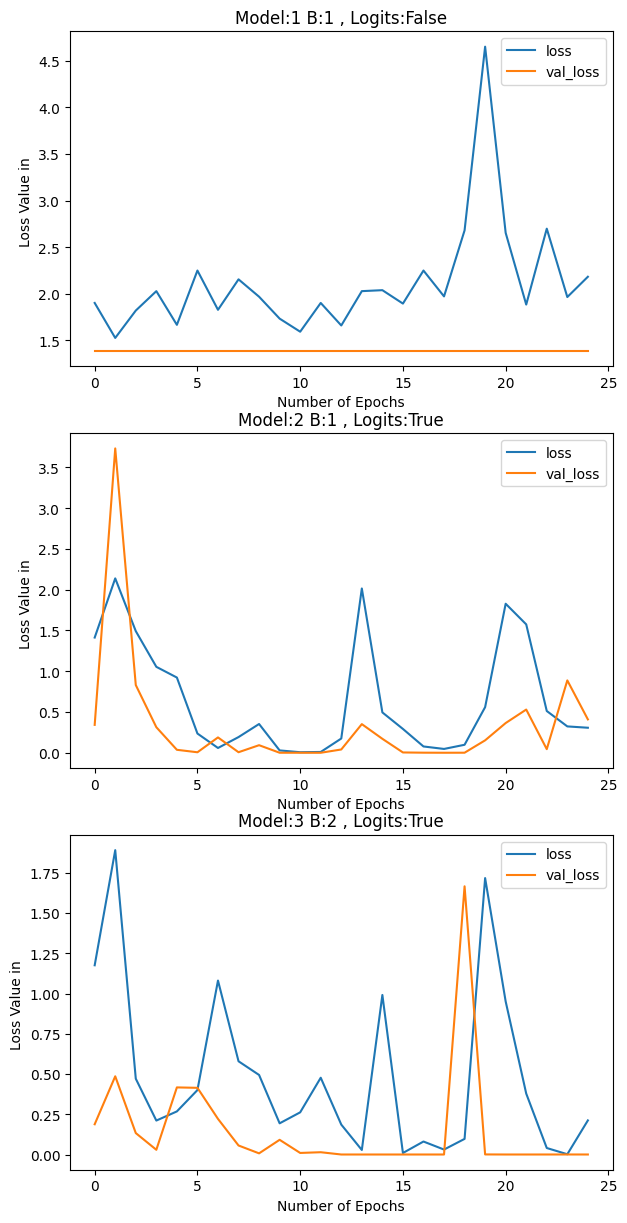

In [106]:

wavefile_plotter = plt.figure(figsize=(7,20))
metrics_1  = wavefile_plotter.add_subplot(411)
metrics_2  = wavefile_plotter.add_subplot(412)
metrics_3  = wavefile_plotter.add_subplot(413)

metrics = history_1.history
metrics_1.plot(history_1.epoch, metrics['loss'], metrics['val_loss'])
metrics_1.legend(['loss', 'val_loss'])
metrics_1.set_xlabel("Number of Epochs")
metrics_1.set_ylabel('Loss Value in ')
metrics_1.set_title("Model:1 B:1 , Logits:False")

metrics = history_2.history
metrics_2.plot(history_2.epoch, metrics['loss'], metrics['val_loss'])
metrics_2.legend(['loss', 'val_loss'])
metrics_2.set_xlabel("Number of Epochs")
metrics_2.set_ylabel('Loss Value in ')
metrics_2.set_title("Model:2 B:1 , Logits:True")

metrics = history_3.history
metrics_3.plot(history_3.epoch, metrics['loss'], metrics['val_loss'])
metrics_3.legend(['loss', 'val_loss'])
metrics_3.set_xlabel("Number of Epochs")
metrics_3.set_ylabel('Loss Value in ')
metrics_3.set_title("Model:3 B:2 , Logits:True")

- Accuracy Comparison

Text(0.5, 1.0, 'Model:3 B:2 , Logits:True')

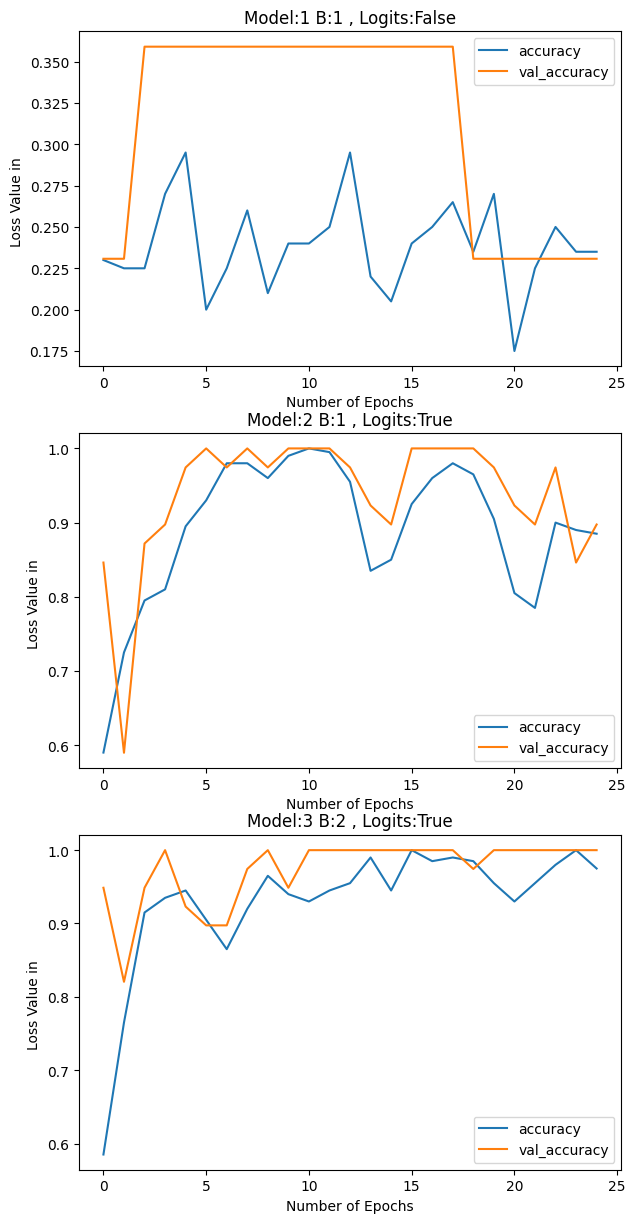

In [107]:
wavefile_plotter = plt.figure(figsize=(7,20))
metrics_1  = wavefile_plotter.add_subplot(411)
metrics_2  = wavefile_plotter.add_subplot(412)
metrics_3  = wavefile_plotter.add_subplot(413)

metrics = history_1.history
metrics_1.plot(history_1.epoch, metrics['accuracy'], metrics['val_accuracy'])
metrics_1.legend(['accuracy', 'val_accuracy'])
metrics_1.set_xlabel("Number of Epochs")
metrics_1.set_ylabel('Loss Value in ')
metrics_1.set_title("Model:1 B:1 , Logits:False")

metrics = history_2.history
metrics_2.plot(history_2.epoch, metrics['accuracy'], metrics['val_accuracy'])
metrics_2.legend(['accuracy', 'val_accuracy'])
metrics_2.set_xlabel("Number of Epochs")
metrics_2.set_ylabel('Loss Value in ')
metrics_2.set_title("Model:2 B:1 , Logits:True")

metrics = history_3.history
metrics_3.plot(history_3.epoch, metrics['accuracy'], metrics['val_accuracy'])
metrics_3.legend(['accuracy', 'val_accuracy'])
metrics_3.set_xlabel("Number of Epochs")
metrics_3.set_ylabel('Loss Value in ')
metrics_3.set_title("Model:3 B:2 , Logits:True")

- Test Data Predictions

In [108]:
test_specs = []
testdata_labels = []
for spectrogram , label in testing_ds:
  test_specs.append(spectrogram.numpy())
  testdata_labels.append(label.numpy())



test_specs = np.array(test_specs)
testdata_labels = np.array(testdata_labels)

In [110]:
model_prediction = audio_led_model_3.predict(test_specs)

print("All Labels :"  , labels)
print("Model Predictions :" , model_prediction[10])
print("Actual Label:" , testdata_labels[10])
print("Max Value of prediction :" , np.argmax(model_prediction[10]))

2/2 [==============================] - 1s 95ms/step
All Labels : ['green' 'off' 'on' 'red']
Model Predictions : [ -9.08909   29.98535    9.300961 -38.372204]
Actual Label: 1
Max Value of prediction : 1


In [111]:
model_prediction_labels = np.argmax(audio_led_model_3.predict(test_specs) , axis =1)
model_prediction_labels

2/2 [==============================] - 1s 73ms/step


array([2, 2, 2, 1, 3, 0, 2, 2, 3, 0, 1, 3, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       1, 1, 1, 3, 3, 1, 2, 2, 1, 1, 2, 2, 3, 0, 0, 2, 0])

- Confusion Matrix

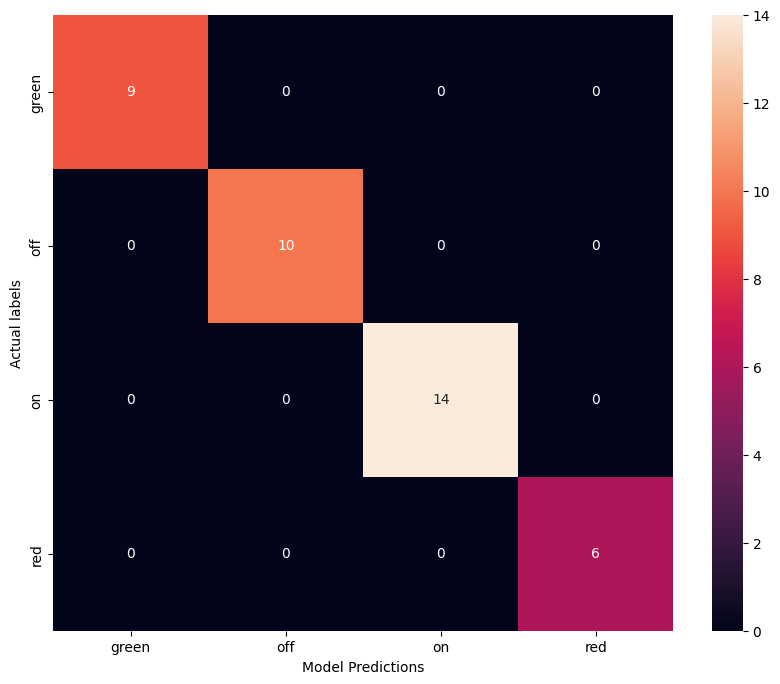

In [112]:
confusion_matrix = tf.math.confusion_matrix(testdata_labels,model_prediction_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix,yticklabels=labels,xticklabels=labels,annot=True, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('Actual labels')
plt.show()

- Saving The Model

In [113]:
audio_led_model_3.save("/content/audio_led_model_3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tensorflow Lite Conversion and Comparisons

In [114]:

converter = tf.lite.TFLiteConverter.from_keras_model(audio_led_model_3)
converter.optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
tflite_model = converter.convert()

In [115]:
open("audio_led_model_3.tflite","wb").write(tflite_model)
print("Main Model Size :" , round((os.path.getsize("/content/audio_led_model_3.h5"))/(1024*1024) ,3 ) , "MB")
print("Lite Model Size :" , round((os.path.getsize("/content/audio_led_model_3.tflite"))/(1024*1024),3 ), "MB"  )


Main Model Size : 19.757 MB
Lite Model Size : 6.576 MB


- Testing *TFLite* Model

In [116]:


interpreter = tf.lite.Interpreter('/content/audio_led_model_3.tflite')

input_details   = interpreter.get_input_details()
output_details = interpreter.get_output_details()


print(input_details)

print("-"*10)
print(output_details)
print("-"*10)
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])



[{'name': 'serving_default_input_3:0', 'index': 0, 'shape': array([  1,   1, 129, 338], dtype=int32), 'shape_signature': array([ -1,   1, 129, 338], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
----------
[{'name': 'StatefulPartitionedCall:0', 'index': 21, 'shape': array([1, 4], dtype=int32), 'shape_signature': array([-1,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
----------
Input Shape: [  1   1 129 338]
Input Type: <class 'numpy.float32'>
Output Shape: [1 4]
Output Type: <class 'numpy.float32'>


- Inferencing

In [121]:
test_file = '/content/data/green/green_1.wav'

test_single_file = raw_wavefile_path_to_Spectrogram([str(test_file)])

for spectrogram , label in test_single_file.batch(1):
  interpreter.allocate_tensors()
  interpreter.set_tensor(input_details[0]['index'] , spectrogram)
  interpreter.invoke()

  tflite_prediction_result = interpreter.get_tensor(output_details[0]['index'])
  print("Lite Model Predictions :",tflite_prediction_result, "\n" ) #  labels[np.argmax(tflite_prediction_result)]


Lite Model Predictions : [[153.86499  -38.202232 -20.181501 -53.98564 ]] 



In [118]:
labels

array(['green', 'off', 'on', 'red'], dtype='<U5')